#Pre-Processing

In [ ]:
import pandas as pd #importing the required libraries
import numpy as np
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sb
import scipy
import math

In [ ]:
df=pd.read_csv('NDAP_REPORT_7004.csv') #reading the csv into dataframe
display(df)

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


In [ ]:
df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['Houses having grass or thatch or bamboo etc. as material of wall'] = pd.to_numeric(df.replace({'Houses having grass or thatch or bamboo etc. as material of wall' : {'zero':0}})['Houses having grass or thatch or bamboo etc. as material of wall']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['Houses having plastic or polythene as material of wall'] = pd.to_numeric(df.replace({'Houses having plastic or polythene as material of wall' : {'zero':0}})['Houses having plastic or polythene as material of wall']) #convert to numeric , there were errors with parsing zero so add a rule to replace it
df['District lgd code']=df['District lgd code'].replace(999999,np.nan) # one district is named unknown with code 999999
df.dropna(inplace=True)
df.round() # rounding float values
for i in df.columns.values:
  if df[i].dtype=='float64':
    df[i]=df[i].astype(np.int64)
display(df)

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710,3014,3034,480,229,76229,1400,768
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807,123,268,93,98,23789,1894,260
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561,134,168,7174,960,748,306,214,73342,1013,1498
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935,24,187,30,39,11297,454,94
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312,410,173,19207,3227,12552,5479,1740,72686,2118,2715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426,95,72,185,130,39160,1927,5
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50,2,238,5094,0,2,5,13
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6,0,165,4820,11,147,116,2
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939,145,113,74,96,12642,897,12


In [ ]:
for col in df.columns[9:]: #iterate over the required columns
  df[col+'_pc']=df[col]/df[df.columns[8]]*100 #add the new column named in the format 'old column name + pc' , to this column put the value of df[col] divided by column I multiplied by 100
display(df) #display the changed df

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,...,Houses having grass or thatch or bamboo etc. as material of wall_pc,Houses having plastic or polythene as material of wall_pc,Houses having mud or unburnt brick as material of wall_pc,Houses having wood as material of wall_pc,Houses having stone not packed with mortar as material of wall_pc,Houses having stone packed with mortar as material of wall_pc,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall_pc,Houses having burnt brick as material of wall_pc,Houses having concrete as material of wall_pc,Houses having any other material of wall_pc
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,...,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,...,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561,134,...,0.156613,0.196351,8.384661,1.122007,0.874230,0.357640,0.250114,85.718961,1.183951,1.750798
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,...,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312,410,...,0.340781,0.143793,15.964326,2.682193,10.432875,4.553993,1.446240,60.414589,1.760423,2.256633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,...,0.476955,0.354175,1.005856,0.224311,0.170004,0.436815,0.306951,92.463166,4.549962,0.011806
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,...,0.110906,0.000000,0.924214,0.036969,4.399261,94.158965,0.000000,0.036969,0.092421,0.240296
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,...,0.208373,0.018943,0.113658,0.000000,3.125592,91.305171,0.208373,2.784618,2.197386,0.037886
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,...,46.396295,0.175102,13.948825,0.409512,0.319137,0.208992,0.271125,35.703796,2.533326,0.033891


Pre-processing required

#Question 1

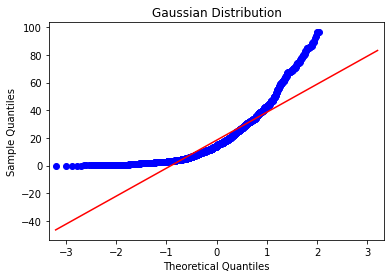

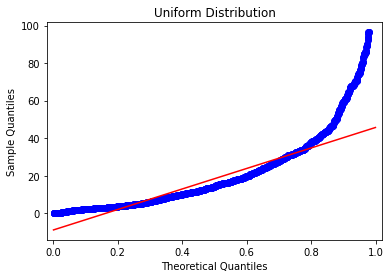

In [ ]:
sm.qqplot(df['Houses having mud or unburnt brick as material of wall_pc'],line='q')
pyplot.title('Gaussian Distribution')
pyplot.show()
sm.qqplot(df['Houses having mud or unburnt brick as material of wall_pc'],scipy.stats.uniform(),line='q')
pyplot.title('Uniform Distribution')
pyplot.show()

Between the standard Gaussian and Uniform distribution , Uniform is a better fit because deviations from a straight line are lesser than the deviations in Gaussian

Text(0.5, 1.0, 'Mean = 20.96393145968796 Standard Deviation = 20.99700482343149')

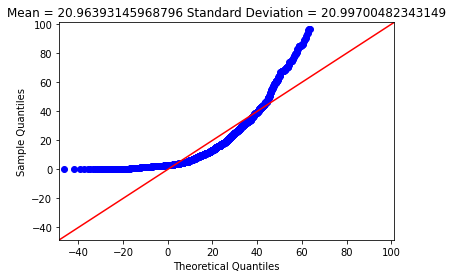

In [ ]:
avg=df['Houses having mud or unburnt brick as material of wall_pc'].mean() #using in built pd methods
sd=df['Houses having mud or unburnt brick as material of wall_pc'].std()
sm.qqplot(df['Houses having mud or unburnt brick as material of wall_pc'],loc=avg,scale=sd,line='45')
pyplot.title('Mean = '+str(avg)+' Standard Deviation = '+str(sd))

MLE parameters for a Gaussian distribution turn out to be sample mean and sample standard deviation. These can be calculated using pandas methods.
The sample mean is 20.96393 and sample standard deviation is 20.997

MLE parameters are a= 0.0  b= 96.46096709592217


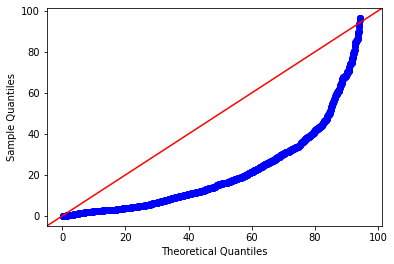

In [ ]:
least=df['Houses having mud or unburnt brick as material of wall_pc'].min() #mle parameters are min and max
highest=df['Houses having mud or unburnt brick as material of wall_pc'].max()
sm.qqplot(df['Houses having mud or unburnt brick as material of wall_pc'],scipy.stats.uniform,loc=least,scale=highest-least,line='45')
print('MLE parameters are a=',least,' b=',highest)

For a Uniform distribution the MLE parameters are the minimum and maximum values in the sample data. In our sample the min is 0 and max is 96.46

In [ ]:
#L_gauss=0
#L_uni=0
#data_len=df['Houses having mud or unburnt brick as material of wall_pc'].shape[0]
#data=df['Houses having mud or unburnt brick as material of wall_pc'].iloc()
#for i in range(data_len):
  #L_gauss+=(scipy.stats.norm.logpdf(data[i],loc=avg,scale=sd))
  #L_uni+=(scipy.stats.uniform.logpdf(data[i],loc=least,scale=highest-least))
  #print(scipy.stats.norm.logpdf(data[i],loc=avg,scale=sd),scipy.stats.uniform.logpdf(data[i],loc=least,scale=highest-least))
#print(L_gauss,L_uni,data_len*math.log(1/highest-least))

#initially I was iterating over all rows however found out that operation can be vectorized to give numpy array

L_gauss=scipy.stats.norm.logpdf(df['Houses having mud or unburnt brick as material of wall_pc'],loc=avg,scale=sd)
L_uni=scipy.stats.uniform.logpdf(df['Houses having mud or unburnt brick as material of wall_pc'],loc=least,scale=highest-least)
L_gauss=L_gauss[np.logical_not(np.isnan(L_gauss))]
L_uni=L_uni[np.logical_not(np.isnan(L_uni))]
print(L_gauss.sum(),L_uni.sum())


-6413.288444952372 -6565.851938949313


In the log-likelihood less negative values are better as it corresponds to higher probability. Hence Gaussian with MLE parameters explains the data better than Uniform with MLE parameters 

#Question 2

Sample Quantiles [ 0.          0.12544986  0.2830914   0.5253433   0.78059409  1.06102589
  1.40463712  1.58456947  1.82471767  1.95111425  2.10884261  2.23374798
  2.35782323  2.54244263  2.66515192  2.7597051   2.90913033  3.02523343
  3.12121491  3.34170719  3.50949815  3.70392659  3.93857607  4.091
  4.2598382   4.44685466  4.78930034  4.98055381  5.15927872  5.42199061
  5.89212621  6.21363952  6.57328265  6.92255193  7.34154045  7.8074924
  8.33745821  8.59395764  9.09521895  9.38998018  9.80587235 10.0773259
 10.47856783 10.81430456 11.12906182 11.48236014 11.76510988 12.25912828
 12.70523744 13.32570354 13.62422084 14.17069597 14.99002769 15.49762624
 15.89875181 16.22787579 16.64851684 17.28655936 17.83244433 18.29454742
 18.79084177 19.54819103 20.08930659 20.95293967 21.76819064 22.50966171
 23.19567486 24.16485568 25.14938537 25.90855082 26.5132414  27.21203593
 28.31432097 29.10335425 30.08721531 31.06449196 31.49260069 32.434643
 33.03878109 33.84267595 35.34616072 36.472

Text(0.5, 1.0, 'Q-Q Plot')

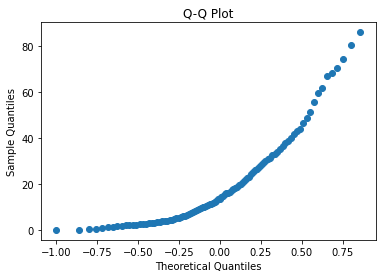

In [ ]:
n=99
arr=np.arange(0,1,1/(n+1))
actual_arr=np.array(df['Houses having mud or unburnt brick as material of wall_pc'].dropna())
actual_arr=np.sort(actual_arr)
actual_q=np.quantile(actual_arr,arr) #geenrate quantiles with the quantiles given by arr
print('Sample Quantiles',actual_q)
for i in range(len(arr)):
  if arr[i]<=0.5: #implementing calculation of inv cdf
    arr[i]=math.sqrt(2*arr[i])-1
  else:
    arr[i]=1-math.sqrt(2-2*arr[i])
print('Theorectical Quantiles',arr)
pyplot.scatter(arr,actual_q) #plotting
pyplot.xlabel('Theoretical Quantiles')
pyplot.ylabel('Sample Quantiles')
pyplot.title('Q-Q Plot')

The tent function has been used instead of the IQ function. The inverse CDF of tent function is sqrt(2x)-1 for 0<=x<=0.5
                                    1-sqrt(2-2x) for 0.5<=x<=1

<img src='https://drive.google.com/uc?id=1fWj_ikBNR3gzbevGBJ8uwKfF2c58J3EJ'>

<img src='https://drive.google.com/uc?id=1fYRnji21JzJ2Xy8Qf_ufR7k3W9BN4kOp'>

In [ ]:

def mle(arr):
  mu=arr.sum()
  mu2=-(arr*arr).sum()
  mle_estimate=-mu/mu2+(math.sqrt((mu/mu2)**2+4*len(arr)/mu))
  return mle_estimate

print(mle(np.array(df['Houses having mud or unburnt brick as material of wall_pc'].dropna())))

0.46128131017063


In [ ]:
log = lambda x : math.log(x)
print((0.41*(1-0.41*np.array(df['Houses having mud or unburnt brick as material of wall_pc'].dropna()))))

[-3.07746266 -3.00344997 -0.99946155 ...  0.39089411 -1.9347975
 -0.33418457]


#Question 3

In [ ]:
urban_data=df[df['Type of residence namely rural or urban']=='Urban'] #group urban data
rural_data=df[df['Type of residence namely rural or urban']=='Rural'] #group rural data
rural_arr=np.array(rural_data['Houses having mud or unburnt brick as material of wall_pc'].dropna())
urban_arr=np.array(urban_data['Houses having mud or unburnt brick as material of wall_pc'].dropna())

temp,p_value=scipy.stats.ttest_ind(a=rural_arr,b=urban_arr,equal_var=False,alternative='greater')
ci=0.1 #ci value taken to be 0.1 as experiment not critical
print('p value ',p_value)
if p_value < ci:    
    print(" Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

p value  8.697556323705343e-45
 Rejecting null hypothesis


Used paired t test as urban and rural for each district are paired. Categorical data is binary and we have numerical values for %age 

In [ ]:
temp_l=[(rural_arr[i],urban_arr[i]) for i in range(min(len(rural_arr),len(urban_arr)))] #construct paired data
temp_df = pd.DataFrame(temp_l, columns=['Rural','Urban']) #create temp dataframe having only these two
print(temp_df.corr('pearson')) #calculating pearson's correlation for parametrized distribution

          Rural     Urban
Rural  1.000000  0.357494
Urban  0.357494  1.000000


Correlation is not that strong , so cannot be predicted
Used person's correlation assuming data comes from a distribution 

In [ ]:
df_auto=pd.read_csv('Automobile_data.csv') #read data in pd dataframe
data=pd.crosstab(df_auto['body-style'],df_auto['drive-wheels']) #crosstab to get relevant data
stat, p, dof, expected=scipy.stats.chi2_contingency(data) #use chi square from scipy
n_rows=len(df_auto.iloc[0:5,0]) #number of acual rows
n_cols=len(df_auto.iloc[0,0:3]) #number of columns 
dof=(n_rows-1)*(n_cols-1) 
alpha=0.05 #taking alpha to be 0.05 as hypothesis is not a critical matter

chi2_arr=np.array([0.0,0.0,0.0])
for o,e in zip(data.values,expected): #generating the chi2 fields
  chi2_arr+=(o-e)**2/e
chi2_stat=sum(chi2_arr[0:2])

critical_val=scipy.stats.chi2.ppf(q=1-alpha,df=dof) #critical value using scipy
print('Critical value',critical_val)
p_value=1-scipy.stats.chi2.cdf(x=chi2_stat,df=dof) #p value
print('p value ',p_value)
if chi2_stat>=critical_val: #condition to check whether related
    print("Body style and drive wheels are related")
else:
    print("Body style and drive wheels are not related")

Critical value 15.50731305586545
p value  0.045865491763983246
Body style and drive wheels are related


Used Chi squared test for categorical vs categorical data